In [1]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# Merge Customers and Transactions datasets

In [4]:
import pandas as pd  # Import pandas

# Load the CSV files into DataFrames
transactions = pd.read_csv(r'C:\Users\hansi\OneDrive\Desktop\zeotap_assessment\ecommerce_analysis\data\Transactions.csv')
customers = pd.read_csv(r'C:\Users\hansi\OneDrive\Desktop\zeotap_assessment\ecommerce_analysis\data\Customers.csv')

# Merge the transactions and customers datasets on 'CustomerID'
cluster_data = pd.merge(transactions, customers, on='CustomerID')


# Aggregate transaction data by CustomerID

In [5]:
customer_cluster_data = cluster_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Scale data for clustering


In [7]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

# Load your datasets (adjust paths if necessary)
transactions = pd.read_csv(r'C:\Users\hansi\OneDrive\Desktop\zeotap_assessment\ecommerce_analysis\data\Transactions.csv')
customers = pd.read_csv(r'C:\Users\hansi\OneDrive\Desktop\zeotap_assessment\ecommerce_analysis\data\Customers.csv')

# Assuming 'customer_cluster_data' is a merged DataFrame of customers and transactions
customer_cluster_data = pd.merge(transactions, customers, on='CustomerID')

# Apply scaling to the 'TotalValue' and 'Quantity' columns
scaler = StandardScaler()
scaled_cluster_data = scaler.fit_transform(customer_cluster_data[['TotalValue', 'Quantity']])

# Convert the scaled data back to a DataFrame
scaled_cluster_data_df = pd.DataFrame(scaled_cluster_data, columns=['Scaled_TotalValue', 'Scaled_Quantity'])

# Optionally, you can add the scaled data to the original DataFrame
customer_cluster_data = pd.concat([customer_cluster_data, scaled_cluster_data_df], axis=1)

# Now you can use 'customer_cluster_data' with the scaled values


In [8]:
distortions = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_cluster_data)
    distortions.append(kmeans.inertia_)

# Plot Elbow Curve

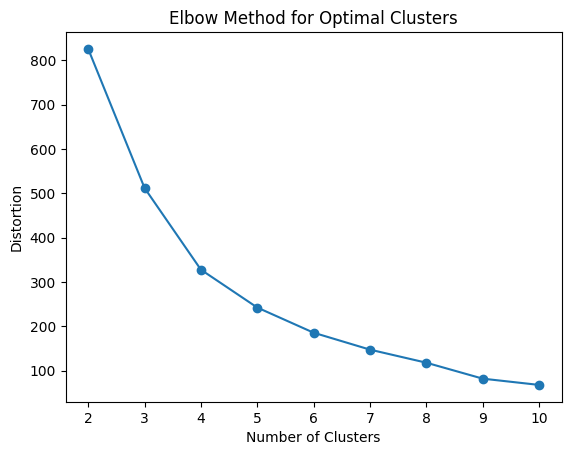

In [9]:
plt.plot(range(2, 11), distortions, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

# Calculate Davies-Bouldin Index

In [11]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

# Load your datasets (adjust paths if necessary)
transactions = pd.read_csv(r'C:\Users\hansi\OneDrive\Desktop\zeotap_assessment\ecommerce_analysis\data\Transactions.csv')
customers = pd.read_csv(r'C:\Users\hansi\OneDrive\Desktop\zeotap_assessment\ecommerce_analysis\data\Customers.csv')

# Merge the transactions and customers datasets on 'CustomerID'
customer_cluster_data = pd.merge(transactions, customers, on='CustomerID')

# Apply scaling to the 'TotalValue' and 'Quantity' columns
scaler = StandardScaler()
scaled_cluster_data = scaler.fit_transform(customer_cluster_data[['TotalValue', 'Quantity']])

# Run KMeans clustering (you can adjust the number of clusters based on your data)
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust number of clusters as needed
customer_cluster_data['Cluster'] = kmeans.fit_predict(scaled_cluster_data)

# Now calculate the Davies-Bouldin Index
db_index = davies_bouldin_score(scaled_cluster_data, customer_cluster_data['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')


Davies-Bouldin Index: 0.8686222607433081


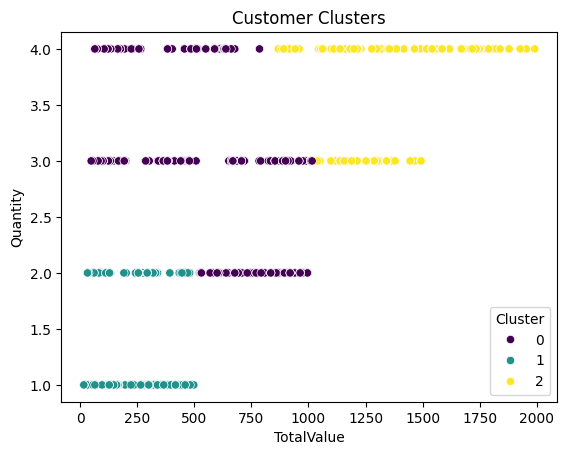

In [13]:
import seaborn as sns  # Import Seaborn
import matplotlib.pyplot as plt  # Import Matplotlib for plotting

# Scatter plot to visualize customer clusters
sns.scatterplot(x='TotalValue', y='Quantity', hue='Cluster', data=customer_cluster_data, palette='viridis')
plt.title('Customer Clusters')
plt.show()


In [14]:
customer_cluster_data.to_csv('output/Customer_Clusters.csv', index=False)